<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/06_uczenie_maszynowe/02_metryki_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Matryki - Klasyfikacja binarna

Accuracy - Dokładność klasyfikacji

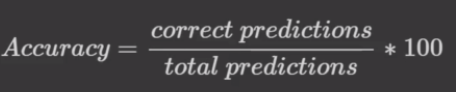

In [3]:
y_true = np.array([1,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1])
y_pred = np.array([0,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1])

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.8

In [6]:
results = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [9]:
results = results.sort_values(by='y_true')
results = results.reset_index(drop=True)
results['sample'] = results.index + 1 
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,1,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,0,10


In [19]:
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=1000,title='Klasyfikator binarny')
fig.show()

macierz konfuzji/pomyłek

In [20]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_true, y_pred)

In [25]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred0', 'pred1'], index=['true1', 'true0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice',
                                    showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='confusion matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [ ]:
# wiersze to wartości prawdziwe
# kolumny to predykcje
# pred0 było przewidzianie faktycznie w 8 przypadkach a w 2 się pomylił
# pred1 było przewidzianie faktycznie w 16 przypadkach a w 4 się pomylił
# model powinien dążyć do tego, aby przekątna macierzy była jak najwyższa a druga przekątna bliska 0
# raczej nigdy model nie będzie w 100% dokładny
# macierz raczej nigdy nie będzie symetryczna - pewne wartości będą bardziej / mniej istotne z punktu widzenia dokładności
# true nagative, false positive, false negative, true positive

In [29]:
tn, fp, fn, tp = cm.ravel()
print('true neg', tn)
print('false pos', fp)
print('false neg', fn)
print('true pos', tp)

true neg 8
false pos 2
false neg 4
true pos 16


In [30]:
# Type I error / błąd pierwszego rodzaju / False Positive Rate
fpr = fp / (fp + tn)
fpr

0.2

In [32]:
# Type II error / False Negative Rate
fnr = fn / (fn + tp)
fnr

0.2

In [36]:
# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
precision.round(2)

0.89

In [37]:
# Recall = jak wiele obserwacji z wszystkich pozytywnych sklasyfikowalismy jako pozytywne
recall = tp / (tp + fn)
print(recall)

0.8


krzywa ROC

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr})

In [41]:
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [44]:
def plot_roc_curve(y_true, y_pred):
  from sklearn.metrics import roc_curve
  fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
  roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr})


  fig = go.Figure(data=[go.Scatter(x=roc['fpr'], y=roc['tpr'], line_color='red', name='ROC Curve'),
      go.Scatter(x=[0,1], y=[0,1], mode='lines', line_dash='dash', line_color='navy')],
      layout=go.Layout(xaxis_title='False Positive Rate',
                       yaxis_title='True Positive Rate',
                       title='ROC Curve',
                       showlegend=False,
                       width=800))
  fig.show()



In [45]:
plot_roc_curve(y_true, y_pred)

In [ ]:
# czerwona linia to model;
# wybieramy ten model, który ma największe pole pod krzywą modelu losowego

Klasyfikacja wieloklasowa

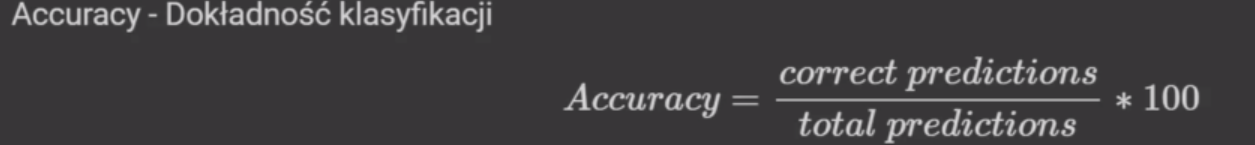

In [48]:
y_true = np.array([1,0,1,2,1,0,1,1,0,1,0,1,1,0,2,1,1,2,2,1,0,1,1,0,2,1,1,2,2])
y_pred = np.array([0,0,1,2,1,0,1,0,0,1,1,0,1,0,2,1,2,1,2,1,0,2,1,0,1,1,1,2,2])
accuracy_score(y_true, y_pred).round(2)

0.72

Macierz konfuzji/pomyłek

In [49]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 6,  1,  0],
       [ 3, 10,  2],
       [ 0,  2,  5]])

In [50]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred0', 'pred1','pred2'], index=['true2', 'true1', 'true0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice',
                                    showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='confusion matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

raport klasyfikacji

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.77      0.67      0.71        15
           2       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29



In [54]:
print(classification_report(y_true, y_pred, target_names=['label1', 'label2', 'label3']))

              precision    recall  f1-score   support

      label1       0.67      0.86      0.75         7
      label2       0.77      0.67      0.71        15
      label3       0.71      0.71      0.71         7

    accuracy                           0.72        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.73      0.72      0.72        29

